In [1]:
#importing files containing functions to perform our tasks
from pickling_functions import load_pickle
import func_model

/Users/vkadava/opt/anaconda3/envs/Hello_World/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-13 11:17:11.748409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Importing essential libraries
from transformers import BertForSequenceClassification, AdamW
import torch

In [3]:
#defining the pre trained model to train with our dataset
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cpu


In [5]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 109,484,547 trainable parameters


In [6]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [7]:
# This variable contains all of the hyperparemeter information our training loop needs and used for optimization
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, correct_bias=False)

/Users/vkadava/opt/anaconda3/envs/Hello_World/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [8]:
base_path = '/Users/vkadava/Desktop/PROJECT3/'

In [9]:
# load preprocessed training and validation data from pickle file

train = load_pickle(base_path + 'train_data')
dev = load_pickle(base_path + 'dev_data')

In [10]:
#feature extraction:
train_features = func_model.loading_data(train)
dev_features = func_model.loading_data(dev)


In [11]:
#getting data in batch loaders:
train_loader = func_model.get_data_loaders(train_features)
dev_loader = func_model.get_data_loaders(dev_features)
  

In [12]:
model_save_path = base_path + 'saved_model.pth'

In [13]:
func_model.training(model, train_loader,dev_loader, optimizer, model_save_path)
#Note:I define training function in such a way that I need to run this cell 4 times ,one for each epoch 
#completion and it updates the model which is in path described above,as my cpu is not sufficient to train
#all at once and runtime is getting stopped
#After execution of this cell our trained model will successfully gets saved as saved_model.pth file in PROJECT3 directory

In [14]:

 #Load the checkpoint file from saved model
checkpoint = torch.load(model_save_path,map_location=torch.device('cpu'))
# Extract the lists of losses and accuracies
train_losses = checkpoint['train_losses']
val_losses = checkpoint['val_losses']
train_acc = checkpoint['train_accuracies']
val_acc = checkpoint['val_accuracies']
#appending values of losses,acuuracies for 4th epoch as model not saved them due to increase in validation loss:
val_losses.append(0.3535)
train_losses.append(0.2374)
val_acc.append(0.8830)
train_acc.append(0.9177)

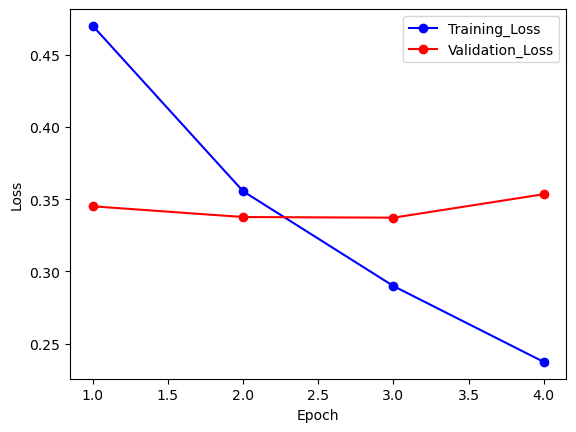

In [15]:
# Plot the losses and accuracies
func_model.Loss_plots(train_losses, val_losses)


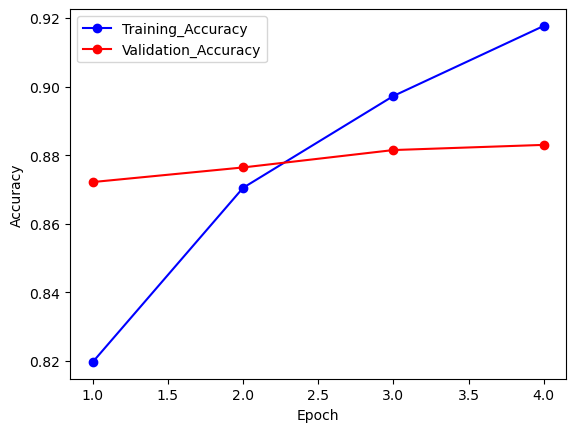

In [16]:
func_model.Accuracy_plots(train_acc, val_acc)

In [17]:
#testing on snli datset:
# load preprocessed training and validation data from pickle file

test = load_pickle(base_path + 'test_data')

In [18]:
#feature extraction:
test_features = func_model.loading_data(test)

In [19]:
#getting data in batch loaders:
test_loader = func_model.get_data_loaders(test_features)

In [20]:
func_model.testing(model_save_path, test_loader)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Test Loss: 0.3691 | Test Acc: 0.8751
